Nama : Dini Aryani

Kode : PYTN-KS19-06

# Statistical Treatment for Retail Dataset (NYC Property Sales)

"NYC Property Sales." Ini adalah dataset yang berisi informasi tentang penjualan properti di Kota New York, Amerika Serikat. Dataset ini memiliki berbagai fitur yang memberikan gambaran tentang transaksi properti, termasuk detail mengenai properti dan penjualan. Dataset ini umumnya digunakan untuk analisis properti dan pemodelan prediktif terkait pasar perumahan di Kota New York.

Berikut adalah beberapa fitur utama dalam dataset "NYC Property Sales" dan penjelasannya:
1. BOROUGH: Daerah (borough) di Kota New York tempat properti berada. Kota New York terdiri dari lima borough: Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
2. NEIGHBORHOOD: Nama lingkungan di mana properti terletak.
3. BUILDING CLASS CATEGORY: Kategori kelas bangunan yang menggambarkan tipe properti, misalnya, "Condos - Elevator Apartments."
4. TAX CLASS AT PRESENT: Kode kelas pajak properti pada saat penjualan.
5. BLOCK: Nomor blok properti.
6. LOT: Nomor lot properti.
7. BUILDING CLASS AT PRESENT: Kode kelas bangunan pada saat penjualan.
8. ADDRESS: Alamat properti.
9. ZIP CODE : kode pos
10. APARTMENT NUMBER: Nomor apartemen (jika ada).
11. RESIDENTIAL UNITS: Jumlah unit tempat tinggal di properti.
12. COMMERCIAL UNITS: Jumlah unit komersial di properti.
13. TOTAL UNITS: Total jumlah unit di properti (termasuk unit tempat tinggal dan komersial).
14. LAND SQUARE FEET: Luas tanah properti dalam kaki persegi.
15. GROSS SQUARE FEET: Luas bangunan dalam faki persegi.
16. YEAR BUILT: Tahun pembangunan properti.
17. TAX CLASS AT TIME OF SALE: Kode kelas pajak properti pada saat penjualan.
18. BUILDING CLASS AT TIME OF SALE: Kode kelas bangunan pada saat penjualan.
19. SALE PRICE: Harga penjualan properti.
20. SALE DATE: Tanggal penjualan properti.

Dataset ini digunakan untuk menganalisis tren penjualan properti, memprediksi harga penjualan, dan melakukan berbagai analisis terkait real estate di Kota New York. 

## Import Library

In [72]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

## Membaca Dataset

In [74]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


## A. Data Preprocessing

### A.1. Menghapus Kolom

In [76]:
df.drop(["Unnamed: 0", "EASE-MENT", "APARTMENT NUMBER", "ADDRESS", "ZIP CODE", "BUILDING CLASS AT PRESENT", "BUILDING CLASS AT TIME OF SALE"], axis=1, inplace=True)

**Keterangan** : </br>
Kolom-kolom tersebut dihapus karena alasan-alasan seperti tidak memberikan informasi yang relevan (seperti Kolom "Unnamed: 0"), dan mengandung informasi identitas yang unik.

### A.2. Mengubah Kode pada kolom 'Borough'

In [77]:
# Mengubah kode menjadi nama masing-masing borough
df['BOROUGH'] = df.BOROUGH.replace({1:"Manhattan", 2:"Bronx", 3:"Brooklyn", 4:"Queens", 5:"Staten Island"})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,5,0,5,1633,6440,1900,2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,28,3,31,4616,18690,1900,2,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,16,1,17,2212,7803,1900,2,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10,0,10,2272,6794,1913,2,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,6,0,6,2369,4615,1900,2,8000000,2016-11-17 00:00:00


### A.3. Menampilkan Infromasi

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    84548 non-null  object
 1   NEIGHBORHOOD               84548 non-null  object
 2   BUILDING CLASS CATEGORY    84548 non-null  object
 3   TAX CLASS AT PRESENT       84548 non-null  object
 4   BLOCK                      84548 non-null  int64 
 5   LOT                        84548 non-null  int64 
 6   RESIDENTIAL UNITS          84548 non-null  int64 
 7   COMMERCIAL UNITS           84548 non-null  int64 
 8   TOTAL UNITS                84548 non-null  int64 
 9   LAND SQUARE FEET           84548 non-null  object
 10  GROSS SQUARE FEET          84548 non-null  object
 11  YEAR BUILT                 84548 non-null  int64 
 12  TAX CLASS AT TIME OF SALE  84548 non-null  int64 
 13  SALE PRICE                 84548 non-null  object
 14  SALE D

### A.4. Mengubah Tipe Data 

#### A.4.1 Tipe Data Datetime

In [79]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

#### A.4.2 Tipe data categoric ke numeric

In [80]:
convert_col = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

for col in convert_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#### A.4.3 Tipe data ke categoric

In [81]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    84548 non-null  object        
 1   NEIGHBORHOOD               84548 non-null  object        
 2   BUILDING CLASS CATEGORY    84548 non-null  object        
 3   TAX CLASS AT PRESENT       84548 non-null  category      
 4   BLOCK                      84548 non-null  int64         
 5   LOT                        84548 non-null  int64         
 6   RESIDENTIAL UNITS          84548 non-null  int64         
 7   COMMERCIAL UNITS           84548 non-null  int64         
 8   TOTAL UNITS                84548 non-null  int64         
 9   LAND SQUARE FEET           58296 non-null  float64       
 10  GROSS SQUARE FEET          56936 non-null  float64       
 11  YEAR BUILT                 84548 non-null  int64         
 12  TAX 

### A.5. Statistik Deskriptif

In [83]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,6.998700e+04,84548
mean,4237.218976,376.224015,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.276456e+06,2017-02-26 10:03:23.018403584
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2016-09-01 00:00:00
25%,1322.750000,22.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,2.250000e+05,2016-11-29 00:00:00
50%,3311.000000,50.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,5.300000e+05,2017-02-28 00:00:00
75%,6281.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,9.500000e+05,2017-05-26 00:00:00
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09,2017-08-31 00:00:00
std,3568.263407,658.136814,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,1.140526e+07,NaN


### A.6 Missing Value

In [84]:
df.isnull().sum()

BOROUGH                          0
NEIGHBORHOOD                     0
BUILDING CLASS CATEGORY          0
TAX CLASS AT PRESENT             0
BLOCK                            0
LOT                              0
RESIDENTIAL UNITS                0
COMMERCIAL UNITS                 0
TOTAL UNITS                      0
LAND SQUARE FEET             26252
GROSS SQUARE FEET            27612
YEAR BUILT                       0
TAX CLASS AT TIME OF SALE        0
SALE PRICE                   14561
SALE DATE                        0
dtype: int64

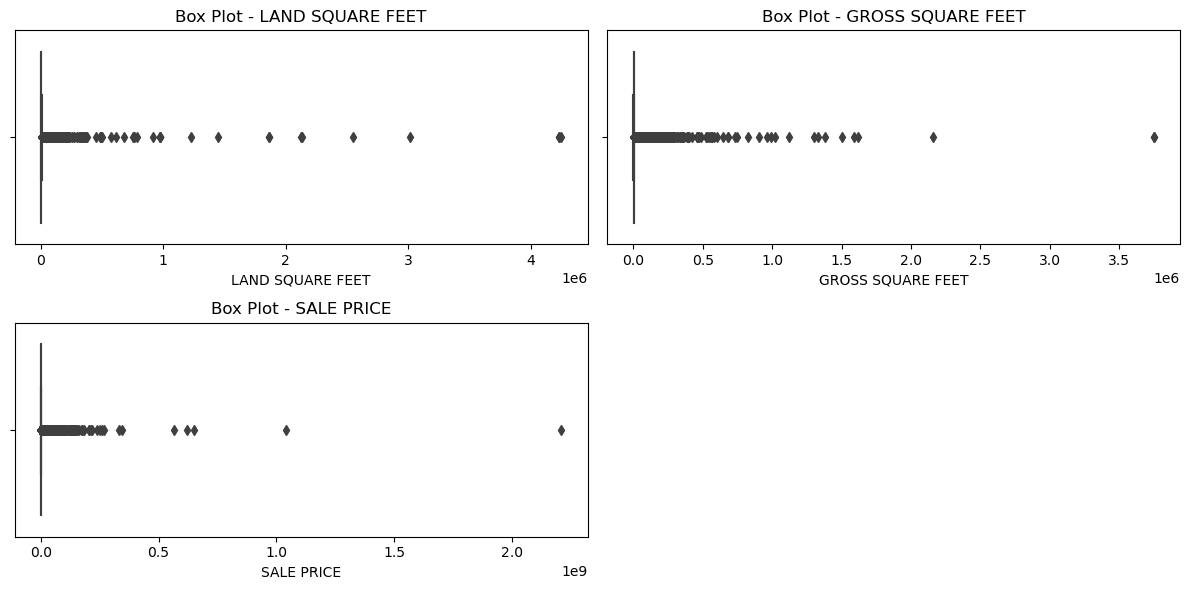

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Box plot LAND SQUARE FEET
plt.subplot(2, 2, 1)
sns.boxplot(x=df['LAND SQUARE FEET'])
plt.title('Box Plot - LAND SQUARE FEET')

# Box plot GROSS SQUARE FEET
plt.subplot(2, 2, 2)
sns.boxplot(x=df['GROSS SQUARE FEET'])
plt.title('Box Plot - GROSS SQUARE FEET')

# Box plot SALE PRICE
plt.subplot(2, 2, 3)
sns.boxplot(x=df['SALE PRICE'])
plt.title('Box Plot - SALE PRICE')

plt.tight_layout()
plt.show()

In [86]:
skewness_land_square_feet = df['LAND SQUARE FEET'].skew()
skewness_gross_square_feet = df['GROSS SQUARE FEET'].skew()
skewness_sale_price = df['SALE PRICE'].skew()

print("Skewness LAND SQUARE FEET:", skewness_land_square_feet)
print("Skewness GROSS SQUARE FEET:", skewness_gross_square_feet)
print("Skewness SALE PRICE:", skewness_sale_price)

Skewness LAND SQUARE FEET: 73.34198070893135
Skewness GROSS SQUARE FEET: 59.636819458079074
Skewness SALE PRICE: 124.09425128278802


**Keterangan :** </br>

Skewness mengukur sejauh mana distribusi data cenderung miring atau asimetris. Nilai skewness dapat positif, negatif, atau nol. </br>
1. LAND SQUARE FEET:
- Skewness LAND SQUARE FEET: 73.34 (Positif)
- Interpretasi: Distribusi data LAND SQUARE FEET cenderung miring ke kanan (positif). Ini berarti ada ekor panjang di sebelah kanan distribusi, dan sebagian besar nilai cenderung berada di sebelah kiri.
2. GROSS SQUARE FEET:
- Skewness GROSS SQUARE FEET: 59.64 (Positif)
- Interpretasi: Distribusi data GROSS SQUARE FEET juga cenderung miring ke kanan (positif). Seperti LAND SQUARE FEET, ini menunjukkan adanya ekor panjang di sebelah kanan distribusi.
3. SALE PRICE:
- Skewness SALE PRICE: 124.09 (Positif)
- Interpretasi: Skewness SALE PRICE sangat tinggi, menunjukkan bahwa distribusi data SALE PRICE sangat miring ke kanan. Ada ekor panjang di sebelah kanan distribusi, dan sebagian besar nilai cenderung berada di sebelah kiri.

Dengan nilai skewness yang tinggi, menggunakan mean sebagai imputasi untuk missing values mungkin tidak akan merepresentasikan distribusi data yang benar karena akan dipengaruhi oleh nilai ekstrem. Sebagai alternatif, median mungkin lebih sesuai karena kurang sensitif terhadap nilai ekstrim dan lebih mencerminkan kecenderungan sentral dari distribusi yang miring.

In [87]:
# Handling Missing value dengan median
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].median(), inplace=True)
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].median(), inplace=True)
df['SALE PRICE'].fillna(df['SALE PRICE'].median(), inplace=True)

In [88]:
# cek kembali missing value
df.isnull().sum()

BOROUGH                      0
NEIGHBORHOOD                 0
BUILDING CLASS CATEGORY      0
TAX CLASS AT PRESENT         0
BLOCK                        0
LOT                          0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
SALE DATE                    0
dtype: int64

### A.7 Data Duplicated

In [89]:
df.duplicated().value_counts()

False    83587
True       961
Name: count, dtype: int64

terdapat 961 data duplikat

In [90]:
df.drop_duplicates(inplace=True)

In [91]:
df.reset_index(drop=True, inplace=True)

In [92]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,5,0,5,1633.0,6440.0,1900,2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,28,3,31,4616.0,18690.0,1900,2,530000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,16,1,17,2212.0,7803.0,1900,2,530000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10,0,10,2272.0,6794.0,1913,2,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,6,0,6,2369.0,4615.0,1900,2,8000000.0,2016-11-17


## B.  Measure of Central Tendency

### B.1 Mean

In [93]:
# Melihat mean dari kolom SALE PRICE
mean_price = df['SALE PRICE'].mean()
print("Mean SALE PRICE:", f"{mean_price:.3f}")

Mean SALE PRICE: 1155403.828


In [94]:
mean_price_borough = df.groupby('BOROUGH').agg({'SALE PRICE':np.mean})
mean_price_borough.sort_values(by='SALE PRICE', ascending=False)

,SALE PRICE
BOROUGH,
Manhattan,2.773636e+06
Brooklyn,8.423449e+05
Queens,6.753599e+05
Bronx,5.955543e+05
Staten Island,5.398224e+05


Text(0, 0.5, 'BOROUGH')

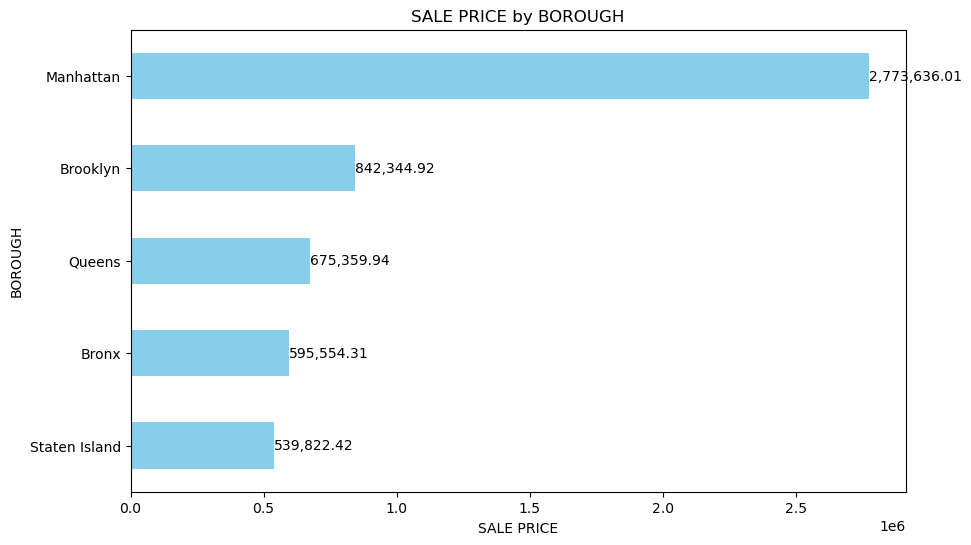

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))
mean_price_borough['SALE PRICE'].sort_values().plot(kind='barh', color='skyblue', ax=ax)

# Anotasi nilai di sebelah batang
for index, value in enumerate(mean_price_borough['SALE PRICE'].sort_values()):
    ax.text(value, index, f'{value:,.2f}', ha='left', va='center')

plt.title("SALE PRICE by BOROUGH")
plt.xlabel("SALE PRICE")
plt.ylabel("BOROUGH")

**Kesimpulan :** </br> 
Berdasarkan data SALE PRICE untuk setiap BOROUGH, kita dapat membuat beberapa kesimpulan:
1. Manhattan memiliki SALE PRICE tertinggi:
Manhattan memiliki SALE PRICE rata-rata yang jauh lebih tinggi dibandingkan dengan BOROUGH lainnya, dengan nilai sekitar 2.77 juta.
2. Urutan SALE PRICE dari tertinggi ke terendah:
Manhattan memiliki SALE PRICE tertinggi diikuti oleh Brooklyn, Queens, Bronx, dan Staten Island.
3. Perbedaan signifikan antara Manhattan dan BOROUGH lainnya:
SALE PRICE di Manhattan secara signifikan lebih tinggi dibandingkan dengan BOROUGH lainnya, menunjukkan perbedaan pasar properti yang mencolok antara Manhattan dan daerah lainnya di New York City.

#### B.1.2 Harmonic Mean

In [96]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,5,0,5,1633.0,6440.0,1900,2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,28,3,31,4616.0,18690.0,1900,2,530000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,16,1,17,2212.0,7803.0,1900,2,530000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10,0,10,2272.0,6794.0,1913,2,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,6,0,6,2369.0,4615.0,1900,2,8000000.0,2016-11-17


In [97]:
from scipy.stats import hmean
# Hitung harmonic mean
harmonic_mean = hmean(df['TAX CLASS AT TIME OF SALE'])

# Tampilkan hasil
print(f"Harmonic Mean of TAX CLASS AT TIME OF SALE: {harmonic_mean:.2f}")

Harmonic Mean of TAX CLASS AT TIME OF SALE: 1.37


**Kesimpulan**
1. Kelas Pajak Properti Cenderung Merata: Rata-rata harmonik sekitar 1.37 menunjukkan bahwa distribusi kelas pajak properti pada saat penjualan cenderung relatif merata. Nilai ini mencerminkan ketergantungan timbal balik antar-nilai dalam kolom 'TAX CLASS AT TIME OF SALE'.
2. Tidak Ada Nilai Negatif atau Nol: Harmonic mean dapat dihitung tanpa masalah, menandakan bahwa tidak ada nilai nol atau negatif dalam kolom 'TAX CLASS AT TIME OF SALE'.
3. Interpretasi Nilai Harmonic Mean: Nilai 1.37 adalah hasil dari perhitungan harmonic mean dan menunjukkan tingkat ketergantungan timbal balik antar-nilai yang moderat.

#### B.1.3 Weighted Mean

In [98]:
# Kolom yang akan dihitung weighted mean-nya
nilai_kolom = df['RESIDENTIAL UNITS']

# Kolom yang akan digunakan sebagai bobot
bobot_kolom = df['TOTAL UNITS']

# Menghitung weighted mean
weighted_mean = sum(nilai_kolom * bobot_kolom) / sum(bobot_kolom)

print("Weighted Mean RESIDENTIAL UNITS:", weighted_mean)

Weighted Mean RESIDENTIAL UNITS: 121.8199468316918


#### B.1.4 Geometric Mean

In [99]:
# Kolom yang akan dihitung geometric mean-nya
land_square = df['LAND SQUARE FEET']

# Menghilangkan nilai-nilai nol karena logaritma dari nol tidak terdefinisi
land_square = land_square.replace(0, np.nan).dropna()

# Menghitung geometric mean menggunakan fungsi gmean dari numpy
geometric_mean_land_square_feet = np.exp(np.mean(np.log(land_square)))

print("Geometric Mean LAND SQUARE FEET:", geometric_mean_land_square_feet)

Geometric Mean LAND SQUARE FEET: 2663.3666151270027


### B.2 Median

In [100]:
# Melihat mean dari kolom SALE PRICE
median_price = df['SALE PRICE'].median()
print("Median SALE PRICE:", f"{median_price:.3f}")

Median SALE PRICE: 530000.000


In [101]:
# Menghitung median SALE PRICE untuk setiap nilai di kolom BOROUGH
median_price_borough = df.groupby('BOROUGH')['SALE PRICE'].median()
median_price_borough = median_price_borough.reset_index()  # Mengembalikan indeks untuk memastikan 'BOROUGH' tetap ada di kolom
median_price_borough.sort_values(by='SALE PRICE', ascending=False)

,BOROUGH,SALE PRICE
2,Manhattan,850000.0
3,Queens,530000.0
4,Staten Island,530000.0
1,Brooklyn,429000.0
0,Bronx,275000.0


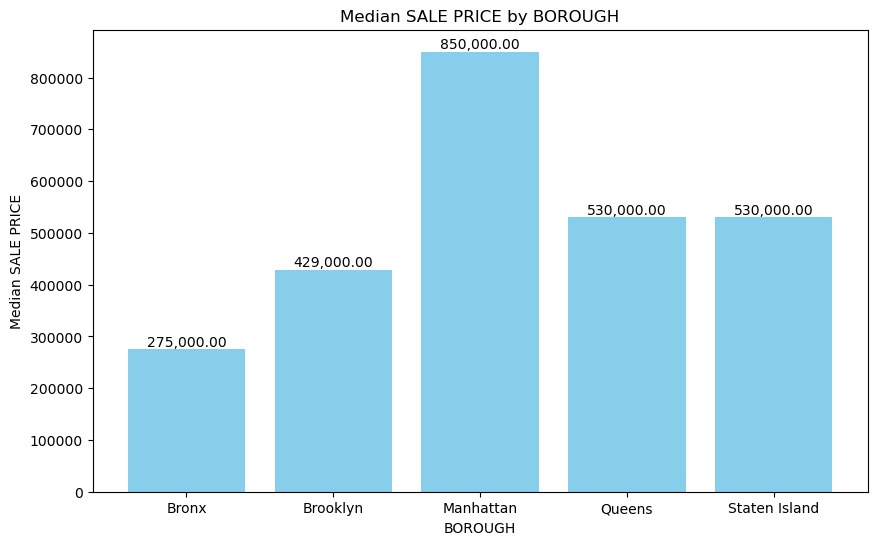

In [102]:
boroughs = median_price_borough['BOROUGH']
sale_prices = median_price_borough['SALE PRICE']

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(boroughs, sale_prices, color='skyblue')

# Anotasi nilai di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.2f}', ha='center', va='bottom', rotation=0, color='black')

plt.title("Median SALE PRICE by BOROUGH")
plt.xlabel("BOROUGH")
plt.ylabel("Median SALE PRICE")

plt.show()

**Kesimpulan :**</br>
Berdasarkan data yang diberikan:

1. Manhattan: Properti di Manhattan memiliki nilai penjualan tertinggi, dengan median SALE PRICE sebesar 850,000. Hal ini menunjukkan bahwa, pada tingkat median, properti di Manhattan cenderung memiliki harga penjualan yang lebih tinggi dibandingkan dengan properti di borough lainnya.

2. Queens dan Staten Island: Queens dan Staten Island memiliki nilai penjualan yang sama, yaitu 530,000. Meskipun jumlahnya lebih rendah dibandingkan dengan Manhattan, ini masih menunjukkan bahwa properti di kedua borough ini memiliki nilai penjualan yang cukup signifikan pada tingkat median.

3. Brooklyn: Properti di Brooklyn memiliki median SALE PRICE sebesar 429,000. Meskipun lebih rendah dibandingkan dengan Manhattan, Brooklyn tetap menunjukkan nilai penjualan yang cukup kuat pada tingkat median.

4. Bronx: Bronx memiliki median SALE PRICE yang paling rendah di antara kelima borough, yaitu 275,000. Ini menunjukkan bahwa properti di Bronx, pada tingkat median, cenderung memiliki nilai penjualan yang lebih rendah dibandingkan dengan borough lainnya.

Kesimpulannya, Manhattan memiliki median SALE PRICE tertinggi, sementara Bronx memiliki median SALE PRICE terendah di antara kelima borough yang disajikan. Analisis ini didasarkan pada data median, yang mengurangkan dampak nilai ekstrem dan memberikan gambaran yang lebih stabil tentang distribusi nilai penjualan properti di setiap borough.

### B.3 Modus

In [103]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,5,0,5,1633.0,6440.0,1900,2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,28,3,31,4616.0,18690.0,1900,2,530000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,16,1,17,2212.0,7803.0,1900,2,530000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10,0,10,2272.0,6794.0,1913,2,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,6,0,6,2369.0,4615.0,1900,2,8000000.0,2016-11-17


In [104]:
# melihat modus dari data dengan type object dan category
modus = df.loc[:,['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE']]
modus

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,2
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,2
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,2
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,2
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,2
...,...,...,...,...,...
83582,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,1
83583,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,1
83584,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,1
83585,Staten Island,WOODROW,22 STORE BUILDINGS,4,4


In [105]:
modus.mode()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE
0,Queens,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,1


**Kesimpulan :** </br>
Nilai yang paling sering muncul dalam setiap kolom tersebut adalah "Queens" untuk BOROUGH, "FLUSHING-NORTH" untuk NEIGHBORHOOD, "01 ONE FAMILY DWELLINGS" untuk BUILDING CLASS CATEGORY, dan "1" untuk TAX CLASS AT PRESENT dan TAX CLASS AT TIME OF SALE.

## C. Measure of Spread

### C.1 Range

In [106]:
# Fitur yang akan dihitung rentangnya
fitur_rentang = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
                 'GROSS SQUARE FEET', 'SALE PRICE']

# Menghitung rentang untuk setiap fitur
for fitur in fitur_rentang:
    rentang = np.ptp(df[fitur])
    print(f"Range {fitur}: {rentang}")

# Alternatif: Menggunakan describe() untuk mendapatkan ringkasan statistik
deskripsi_statistik = df.describe()
print(deskripsi_statistik)

Range RESIDENTIAL UNITS: 1844
Range COMMERCIAL UNITS: 2261
Range TOTAL UNITS: 2261
Range LAND SQUARE FEET: 4252327.0
Range GROSS SQUARE FEET: 3750565.0
Range SALE PRICE: 2210000000.0
              BLOCK           LOT  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
count  83587.000000  83587.000000       83587.000000      83587.000000   
mean    4242.988539    376.642648           1.982437          0.183808   
min        1.000000      1.000000           0.000000          0.000000   
25%     1327.000000     22.000000           0.000000          0.000000   
50%     3321.000000     50.000000           1.000000          0.000000   
75%     6293.500000   1001.000000           2.000000          0.000000   
max    16322.000000   9106.000000        1844.000000       2261.000000   
std     3567.159035    658.420874          16.153206          8.586587   

        TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET    YEAR BUILT  \
count  83587.000000      8.358700e+04       8.358700e+04  83587.000000   
me

In [107]:
# membuat dataframe baru yg berisi rata-rata residential dan commercial units berdasarkan tiap borough
df_spread = df[['BOROUGH','RESIDENTIAL UNITS','COMMERCIAL UNITS']].groupby('BOROUGH').mean()
df_spread

,RESIDENTIAL UNITS,COMMERCIAL UNITS
BOROUGH,,
Bronx,3.348418,0.159387
Brooklyn,2.009494,0.145474
Manhattan,2.199501,0.281198
Queens,1.685654,0.190791
Staten Island,1.230259,0.080410


In [108]:
# menghitung range dari fitur df_spread
range_ru, range_cu = np.ptp(df_spread[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS']], axis=0)

print("Range RESIDENTIAL UNITS:", range_ru)
print("Range COMMERCIAL UNITS:", range_cu)

Range RESIDENTIAL UNITS: 2.118158393280435
Range COMMERCIAL UNITS: 0.20078811785461037


**Kesimpulan :**</br>
1. Range RESIDENTIAL UNITS: 1844
2. Range COMMERCIAL UNITS: 2261
3. Range TOTAL UNITS: 2261
4. Range LAND SQUARE FEET: 4252327.0
5. Range GROSS SQUARE FEET: 3750565.0
6. Range SALE PRICE: 2210000000.0
7. Range RESIDENTIAL UNITS berdasarkan borough: 2.118158393280435
8. Range COMMERCIAL UNITS berdasarkan borough: 0.20078811785461037

### C.2 Variance

In [109]:
df_spread

,RESIDENTIAL UNITS,COMMERCIAL UNITS
BOROUGH,,
Bronx,3.348418,0.159387
Brooklyn,2.009494,0.145474
Manhattan,2.199501,0.281198
Queens,1.685654,0.190791
Staten Island,1.230259,0.080410


In [110]:
# Menghitung varians untuk setiap kolom
var_ru = df_spread['RESIDENTIAL UNITS'].var()
var_cu = df_spread['COMMERCIAL UNITS'].var()

print("Varians RESIDENTIAL UNITS:", var_ru)
print("Varians COMMERCIAL UNITS:", var_cu)

Varians RESIDENTIAL UNITS: 0.6261569380337461
Varians COMMERCIAL UNITS: 0.005381821208331415


**Kesimpulan :** </br>
Varians RESIDENTIAL UNITS berdasarkan borough 0.6261569380337461 </br>
Varians COMMERCIAL UNITS berdasarkan borough 0.005381821208331415

### C.3 Standar Deviation

In [111]:
# Menghitung Standar Deviation untuk setiap kolom pada dataframe df_spread
std_ru = df_spread['RESIDENTIAL UNITS'].std()
std_cu = df_spread['COMMERCIAL UNITS'].std()

print("Standar Deviation RESIDENTIAL UNITS:", std_ru)
print("Standar Deviation COMMERCIAL UNITS:", std_cu)

Standar Deviation RESIDENTIAL UNITS: 0.7913007885966916
Standar Deviation COMMERCIAL UNITS: 0.07336089699786538


**Kesimpulan :** </br>
Standar Deviation RESIDENTIAL UNITS berdasarkan borough 0.7913007885966916 </br>
Standar Deviation COMMERCIAL UNITS berdasarkan borough 0.07336089699786538

## D.  Probability Distribution

In [112]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,5,0,5,1633.0,6440.0,1900,2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,28,3,31,4616.0,18690.0,1900,2,530000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,16,1,17,2212.0,7803.0,1900,2,530000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10,0,10,2272.0,6794.0,1913,2,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,6,0,6,2369.0,4615.0,1900,2,8000000.0,2016-11-17


In [113]:
distribusi = df.loc[:, ['BOROUGH', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'SALE PRICE']]
distribusi.head()

,BOROUGH,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,Manhattan,1900,2,6625000.0
1,Manhattan,1900,2,530000.0
2,Manhattan,1900,2,530000.0
3,Manhattan,1913,2,3936272.0
4,Manhattan,1900,2,8000000.0


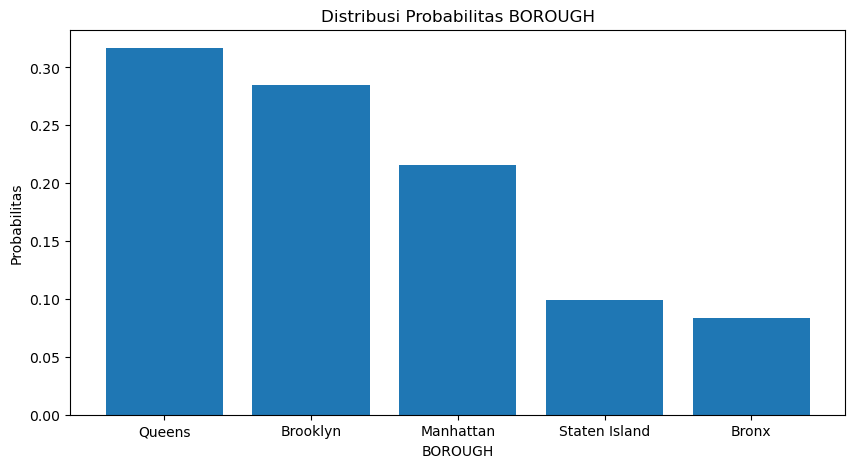

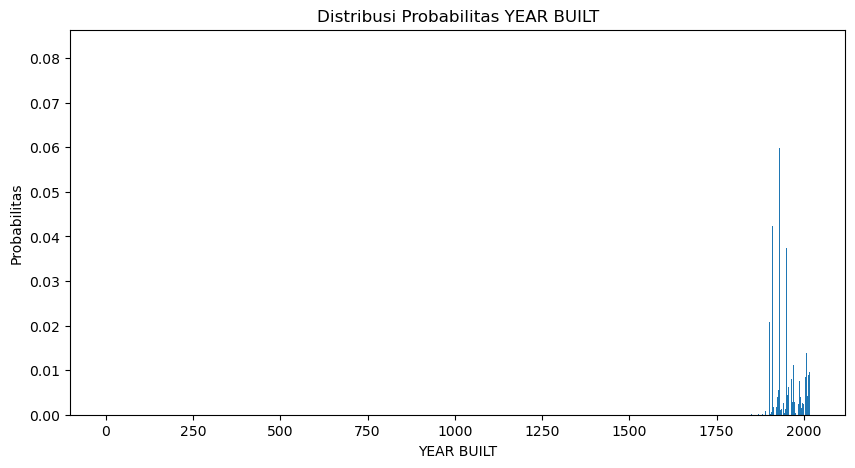

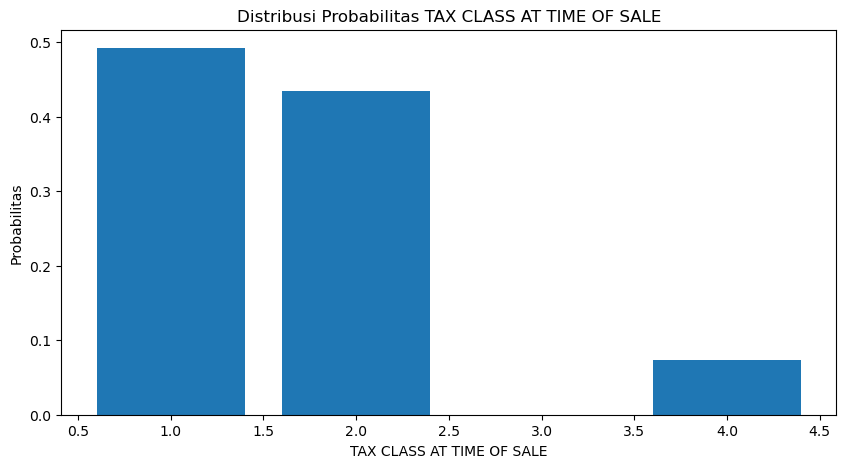

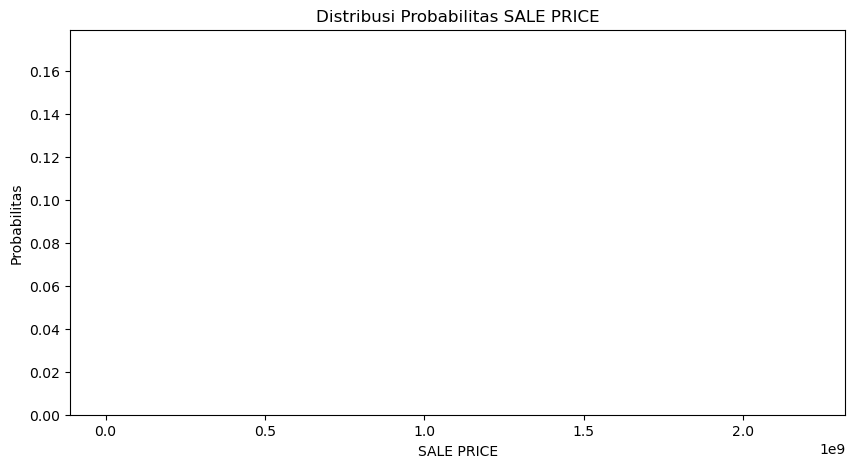

In [114]:
# Menampilkan distribusi probabilitas untuk setiap fitur
for fitur in distribusi:
    prob_distribusi = distribusi[fitur].value_counts(normalize=True)
    
    # Menampilkan distribusi probabilitas dalam bentuk bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(prob_distribusi.index, prob_distribusi.values)
    plt.xlabel(fitur)
    plt.ylabel('Probabilitas')
    plt.title(f'Distribusi Probabilitas {fitur}')
    plt.show()

**Kesimpulan :** </br>
- kolom BOROUGH, YEAR BUILT dan TAX CLASS AT TIME OF SALE berdistribusi gamma

## E. Confidence Intervals

In [121]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,5,0,5,1633.0,6440.0,1900,2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,28,3,31,4616.0,18690.0,1900,2,530000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,16,1,17,2212.0,7803.0,1900,2,530000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10,0,10,2272.0,6794.0,1913,2,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,6,0,6,2369.0,4615.0,1900,2,8000000.0,2016-11-17


In [123]:
from scipy.stats import t

# Pilih data hanya untuk wilayah Queens
data_queens = df[df['BOROUGH'] == 'Queens']['SALE PRICE'].dropna()

# Hitung statistik deskriptif
mean_queens = np.mean(data_queens)
std_dev_queens = np.std(data_queens, ddof=1)  # Gunakan ddof=1 untuk menghitung deviasi baku sampel

# Tentukan tingkat kepercayaan
confidence_level = 0.95

# Hitung margin of error
margin_of_error_queens = t.ppf((1 + confidence_level) / 2, len(data_queens) - 1) * (std_dev_queens / np.sqrt(len(data_queens)))

# Hitung Confidence Interval
lower_bound_queens = mean_queens - margin_of_error_queens
upper_bound_queens = mean_queens + margin_of_error_queens

# Tampilkan hasil
print(f'Mean Sale Price in Queens: {mean_queens}')
print(f'Margin of Error: {margin_of_error_queens}')
print(f'Confidence Interval: ({lower_bound_queens}, {upper_bound_queens})')

Mean Sale Price in Queens: 675359.9358238272
Margin of Error: 32441.536420286124
Confidence Interval: (642918.399403541, 707801.4722441133)


**Kesimpulan :** </br>
Pada tingkat kepercayaan 95%, kita dapat mengatakan bahwa rata-rata harga penjualan properti (Sale Price) di wilayah Queens berada dalam rentang antara 642,918.40 dan 707,801.47. Dengan kata lain, kita yakin bahwa rentang ini mengandung nilai rata-rata sebenarnya dari populasi harga penjualan properti di wilayah Queens. Margin of error sebesar 32,441.54 mengindikasikan sejauh mana kita dapat memperkirakan nilai sebenarnya berada di luar mean yang diamati.

## F. Hypothesis Testing

**Hipotesis Testing untuk Rata-rata Harga Penjualan di Bronx vs. Queens:**
- Hipotesis Nol (H0): Rata-rata harga penjualan properti di Bronx sama dengan rata-rata harga penjualan properti di Queens.
- Hipotesis Alternatif (H1): Rata-rata harga penjualan properti di Bronx berbeda dengan rata-rata harga penjualan properti di Queens.

In [126]:
from scipy.stats import ttest_ind

# Pilih data hanya untuk Bronx dan Queens
data_bronx = df[df['BOROUGH'] == 'Bronx']['SALE PRICE'].dropna()
data_queens = df[df['BOROUGH'] == 'Queens']['SALE PRICE'].dropna()

# Melakukan uji t independent
t_statistic, p_value = ttest_ind(data_bronx, data_queens, equal_var=False)

# Menampilkan hasil uji
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Menarik kesimpulan
alpha = 0.05
if p_value < alpha:
    print('Kita dapat menolak hipotesis nol.')
    print('Terdapat perbedaan yang signifikan dalam rata-rata harga penjualan properti antara Bronx dan Queens.')
else:
    print('Kita tidak dapat menolak hipotesis nol.')
    print('Tidak terdapat bukti yang cukup untuk menyatakan adanya perbedaan signifikan dalam rata-rata harga penjualan properti antara Bronx dan Queens.')

T-Statistic: -2.1381210096153724
P-Value: 0.03252961528890696
Kita dapat menolak hipotesis nol.
Terdapat perbedaan yang signifikan dalam rata-rata harga penjualan properti antara Bronx dan Queens.


**Kesimpulan :**</br>
Berdasarkan hasil uji t dengan T-Statistic sekitar -2.14 dan P-Value sekitar 0.033, kita dapat menarik kesimpulan sebagai berikut:

1. Terdapat Perbedaan yang Signifikan: Kita dapat menolak hipotesis nol yang menyatakan bahwa rata-rata harga penjualan properti di Bronx sama dengan rata-rata harga penjualan properti di Queens.

2. Arah Perbedaan: Karena T-Statistic negatif, ini menunjukkan bahwa rata-rata harga penjualan properti di Bronx lebih rendah dibandingkan dengan rata-rata harga penjualan properti di Queens.

3. Signifikansi Statistik: P-Value sekitar 0.033 kurang dari tingkat signifikansi 0.05, sehingga kita memiliki cukup bukti statistik untuk menyatakan bahwa perbedaan ini signifikan secara statistik.

Dengan demikian, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam rata-rata harga penjualan properti antara Bronx dan Queens, dan rata-rata harga penjualan properti di salah satu dari kedua daerah tersebut dapat dianggap lebih tinggi atau lebih rendah secara signifikan daripada yang lain.